# Pythonチャレンジ: 地震データを探る

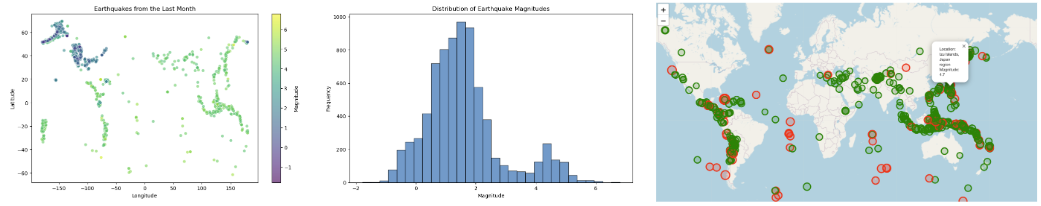

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

### リクエストコード例

In [19]:
%pip install

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: You must give at least one requirement to install (see "pip help install")


In [20]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-11T11:32:16.270Z,33.253667,-116.306333,9.2900,0.60,ml,46.0,39.0,0.07499,0.19,...,2025-11-11T11:35:39.531Z,"6 km E of Borrego Springs, CA",earthquake,0.19,0.420000,0.123,10.0,automatic,ci,ci
1,2025-11-11T11:16:01.940Z,34.039500,-117.212833,5.7000,1.14,ml,79.0,21.0,0.08349,0.18,...,2025-11-11T11:26:27.850Z,"3 km WSW of Redlands, CA",earthquake,0.12,0.580000,0.176,27.0,automatic,ci,ci
2,2025-11-11T11:12:11.883Z,31.768000,-104.169000,8.3598,1.60,ml,11.0,138.0,0.00000,0.30,...,2025-11-11T11:15:52.539Z,"49 km SSE of Whites City, New Mexico",earthquake,0.00,2.270938,0.100,7.0,automatic,tx,tx
3,2025-11-11T10:35:08.049Z,-19.395200,-69.145600,10.0000,4.80,mb,46.0,119.0,0.74200,0.86,...,2025-11-11T11:00:26.040Z,"30 km ESE of Camiña, Chile",earthquake,5.19,1.908000,0.083,45.0,reviewed,us,us
4,2025-11-11T10:34:21.748Z,65.162500,-150.066500,14.0000,1.60,ml,NaN,NaN,NaN,0.49,...,2025-11-11T10:36:23.945Z,"32 km ENE of Manley Hot Springs, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak


## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [25]:
total_quakes = len(data)

# 最大マグニチュード
max_mag = data.loc[data['mag'].idxmax()]

# 日本の地震
japan_quakes = data[data['place'].str.contains("Japan", na=False)]
japan_count = len(japan_quakes)

print("過去1か月の地震総数:", total_quakes)
print("最大マグニチュードの地震:")
print(" 日時:", max_mag['time'])
print(" 場所:", max_mag['place'])
print(" マグニチュード:", max_mag['mag'])
print("日本での地震の数:", japan_count)

過去1か月の地震総数: 7261
最大マグニチュードの地震:
 日時: 2025-11-09T08:03:37.808Z
 場所: 126 km E of Yamada, Japan
 マグニチュード: 6.8
日本での地震の数: 87


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [28]:
strong_quakes = data[data['mag'] > 6.0]

# 重要な地震をループで表示
print("マグニチュード6.0を超える地震一覧：\n")
for _, row in strong_quakes.iterrows():
    print(f"場所: {row['place']}")
    print(f"マグニチュード: {row['mag']}")
    print(f"発生時刻: {row['time']}\n")

# 総数を表示
print("重要な地震の総数:", len(strong_quakes), "件")

マグニチュード6.0を超える地震一覧：

場所: 121 km E of Yamada, Japan
マグニチュード: 6.4
発生時刻: 2025-11-09T08:54:36.991Z

場所: 126 km E of Yamada, Japan
マグニチュード: 6.8
発生時刻: 2025-11-09T08:03:37.808Z

場所: 155 km SE of Petropavlovsk-Kamchatsky, Russia
マグニチュード: 6.1
発生時刻: 2025-11-03T08:44:43.471Z

場所: 22 km WSW of Khulm, Afghanistan
マグニチュード: 6.3
発生時刻: 2025-11-02T20:29:02.028Z

場所: Banda Sea
マグニチュード: 6.4
発生時刻: 2025-10-28T14:40:18.476Z

場所: 162 km E of Beauséjour, Guadeloupe
マグニチュード: 6.5
発生時刻: 2025-10-27T12:38:40.311Z

場所: 59 km NW of Pante Makasar, Timor Leste
マグニチュード: 6.2
発生時刻: 2025-10-26T17:04:25.645Z

場所: 194 km WNW of Abepura, Indonesia
マグニチュード: 6.5
発生時刻: 2025-10-16T05:48:55.498Z

場所: Drake Passage
マグニチュード: 6.3
発生時刻: 2025-10-16T01:42:32.318Z

重要な地震の総数: 9 件


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [27]:
avg_depth = data['depth'].mean()

# 地震の深さカテゴリごとにカウント
shallow = len(data[data['depth'] < 70])
intermediate = len(data[(data['depth'] >= 70) & (data['depth'] <= 300)])
deep = len(data[data['depth'] > 300])

# 結果を出力
print("平均深度:", round(avg_depth, 2), "km")
print("浅い地震 (<70 km):", shallow, "件")
print("中間深度地震 (70–300 km):", intermediate, "件")
print("深い地震 (>300 km):", deep, "件")

平均深度: 21.33 km
浅い地震 (<70 km): 6709 件
中間深度地震 (70–300 km): 494 件
深い地震 (>300 km): 58 件


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [29]:
data['time'] = pd.to_datetime(data['time'], utc=True)
data['time_japan'] = data['time'].dt.tz_convert('Asia/Tokyo')

# 最も早い・遅い地震を特定
earliest = data['time_japan'].min()
latest = data['time_japan'].max()

# 表示
print("地震データ（日本時間に変換）：\n")
for _, row in data.iterrows():
    print(f"場所: {row['place']}")
    print(f"発生日時（日本時間）: {row['time_japan']}")
    print()

print("最も早い地震:", earliest)
print("最新の地震:", latest)

地震データ（日本時間に変換）：

場所: 6 km E of Borrego Springs, CA
発生日時（日本時間）: 2025-11-11 20:32:16.270000+09:00

場所: 3 km WSW of Redlands, CA
発生日時（日本時間）: 2025-11-11 20:16:01.940000+09:00

場所: 49 km SSE of Whites City, New Mexico
発生日時（日本時間）: 2025-11-11 20:12:11.883000+09:00

場所: 30 km ESE of Camiña, Chile
発生日時（日本時間）: 2025-11-11 19:35:08.049000+09:00

場所: 32 km ENE of Manley Hot Springs, Alaska
発生日時（日本時間）: 2025-11-11 19:34:21.748000+09:00

場所: 4 km SE of San Ramon, CA
発生日時（日本時間）: 2025-11-11 19:26:31.480000+09:00

場所: 67 km NW of Karluk, Alaska
発生日時（日本時間）: 2025-11-11 19:17:48.792000+09:00

場所: 10 km WNW of The Geysers, CA
発生日時（日本時間）: 2025-11-11 19:12:10.420000+09:00

場所: 15 km W of Johannesburg, CA
発生日時（日本時間）: 2025-11-11 19:06:43.490000+09:00

場所: 12 km ESE of Stanton, Texas
発生日時（日本時間）: 2025-11-11 18:56:13.316000+09:00

場所: 6 km WNW of Cobb, CA
発生日時（日本時間）: 2025-11-11 18:47:26.640000+09:00

場所: 65 km SE of Boca de Yuma, Dominican Republic
発生日時（日本時間）: 2025-11-11 18:31:55.930000+09:00

場所: 3 km NW of The Ge

**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\akkii\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: Us

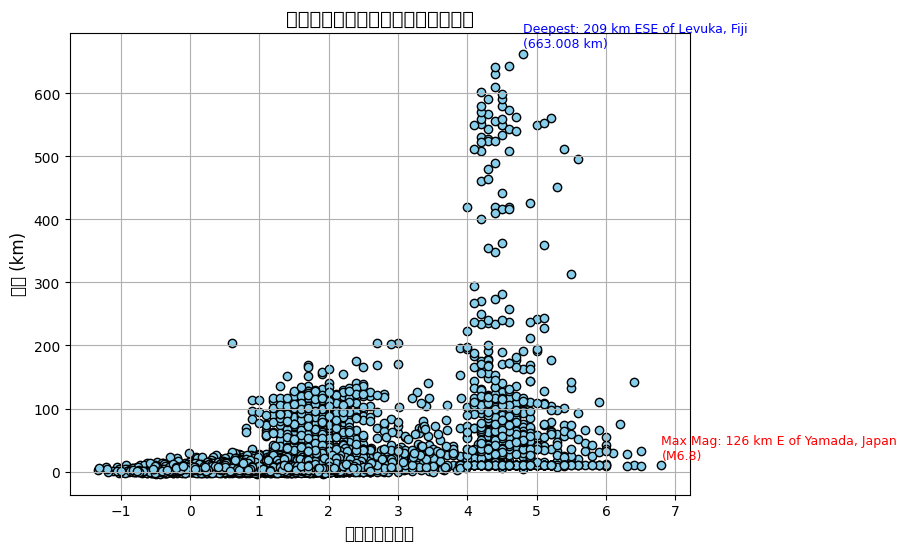

In [31]:
import matplotlib.pyplot as plt
max_mag_quake = data.loc[data['mag'].idxmax()]
deepest_quake = data.loc[data['depth'].idxmax()]

# 散布図を作成
plt.figure(figsize=(8, 6))
plt.scatter(data['mag'], data['depth'], color='skyblue', edgecolor='k')

# 最大マグニチュード地震にラベル
plt.text(max_mag_quake['mag'], max_mag_quake['depth'] + 10,
         f"Max Mag: {max_mag_quake['place']}\n(M{max_mag_quake['mag']})",
         fontsize=9, color='red')

# 最も深い地震にラベル
plt.text(deepest_quake['mag'], deepest_quake['depth'] + 10,
         f"Deepest: {deepest_quake['place']}\n({deepest_quake['depth']} km)",
         fontsize=9, color='blue')

# 軸ラベルとタイトル
plt.xlabel("マグニチュード", fontsize=12)
plt.ylabel("深さ (km)", fontsize=12)
plt.title("地震のマグニチュードと深さの関係", fontsize=14)
plt.grid(True)

# グラフ表示
plt.show()

**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

In [3]:
%pip install folium
import pandas as pd
import folium
from datetime import datetime, timedelta
data["japan_time"] = pd.to_datetime(data["time"]) + timedelta(hours=9)
data["japan_time"] = data["japan_time"].dt.strftime("%Y-%m-%d %H:%M:%S")

def get_color(mag):
    if mag < 4.0:
        return "green"
    elif 4.0 <= mag <= 6.0:
        return "orange"
    else:
        return "red"

m = folium.Map(location=[36.0, 138.0], zoom_start=4)

# 各地震をマップにプロット
for _, row in data.iterrows():
    color = get_color(row["mag"])
    tooltip = (
        f"<b>{row['place']}</b><br>"
        f"マグニチュード: {row['mag']}<br>"
        f"深さ: {row['depth']} km<br>"
        f"日時(日本時間): {row['japan_time']}"
    )
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5 + row["mag"],
        color=color,
        fill=True,
        fill_opacity=0.7,
        tooltip=tooltip
    ).add_to(m)

m.save("earthquakes_map.html")
m

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


NameError: name 'data' is not defined

# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**